# FUZZY LOGIC

PENGONTROL ROBOT DENGAN 2 INPUT SENSOR KANAN & KIRI DAN 1 OUTPUT KECEPATAN RODA
1. memiliki 2 sensor yang diletakkan di kanan dan di kiri Mobile Robot
2. kecepatan maksimal mobile robot adalah 150 m/s. untuk berbelok kekiri atau keanan Mobile robot hanya mengatur perbandingan    kecepatan roda kanan dan roda kiri

Langkah - Langkah :

1. Menentukan Input dan Output

In [1]:
import numpy as np  
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# New Antecedent/Consequent objects hold universe variables and membership
# functions
sensorkiri = ctrl.Antecedent(np.arange(0, 41, 1), 'sensorkiri')
sensorkanan = ctrl.Antecedent(np.arange(0, 41, 1), 'sensorkanan')
kecepatan_roda = ctrl.Consequent(np.arange(0, 101, 1), 'kecepatan')

sensorkiri['dekat'] = fuzz.trimf(sensorkiri.universe, [0, 10, 20])
sensorkiri['sedang'] = fuzz.trimf(sensorkiri.universe, [10, 20, 30])
sensorkiri['jauh'] = fuzz.trimf(sensorkiri.universe, [20, 30, 40])

sensorkanan['dekat'] = fuzz.trimf(sensorkanan.universe, [0, 10, 20])
sensorkanan['sedang'] = fuzz.trimf(sensorkanan.universe, [10, 20, 30])
sensorkanan['jauh'] = fuzz.trimf(sensorkanan.universe, [20, 30, 40])

kecepatan_roda['pelan'] = fuzz.trimf(kecepatan_roda.universe, [0, 20, 40])
kecepatan_roda['cukupcepat'] = fuzz.trimf(kecepatan_roda.universe, [20, 40, 60])
kecepatan_roda['cepat'] = fuzz.trimf(kecepatan_roda.universe, [40, 60, 80])
kecepatan_roda['sangatcepat'] = fuzz.trimf(kecepatan_roda.universe, [60, 80, 100])


2. Menggambarkan Fungsi keanggotaan (proses Fuzzyfikasi). Fungsi Keanggotaan yang digunakan adalah Tringular

dikarenakan sensor kiri dan kanan memiliki karakteristik yang sama maka membership function kedua sensor adalah sama

persamaan sensor kiri

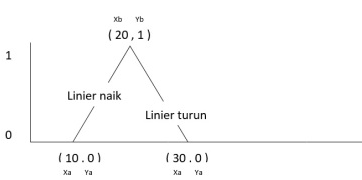

C:\Users\M.Yusuf Raka\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


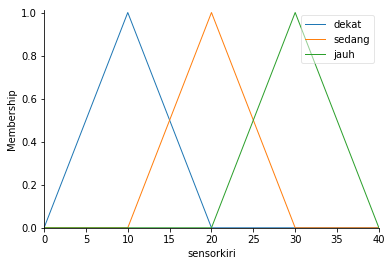

In [2]:
sensorkiri.view()

C:\Users\M.Yusuf Raka\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


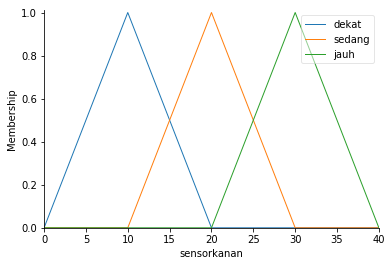

In [3]:
sensorkanan.view()

C:\Users\M.Yusuf Raka\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


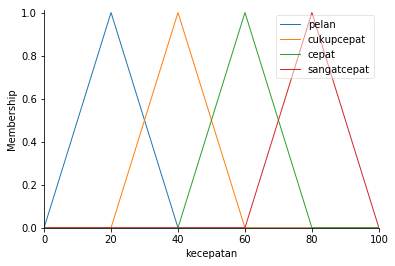

In [4]:
kecepatan_roda.view()

In [5]:
rule01 = ctrl.Rule(sensorkiri['dekat']  & sensorkanan['dekat']   , kecepatan_roda['pelan'])
rule02 = ctrl.Rule(sensorkiri['dekat']  & sensorkanan['sedang']  , kecepatan_roda['cukupcepat'])
rule03 = ctrl.Rule(sensorkiri['dekat']  & sensorkanan['jauh']    , kecepatan_roda['cepat'])
rule04 = ctrl.Rule(sensorkiri['sedang'] & sensorkanan['dekat']   , kecepatan_roda['cukupcepat']) 
rule05 = ctrl.Rule(sensorkiri['sedang'] & sensorkanan['jauh']    , kecepatan_roda['cepat'])
rule06 = ctrl.Rule(sensorkiri['sedang'] & sensorkanan['sedang']  , kecepatan_roda['cukupcepat'])
rule07 = ctrl.Rule(sensorkiri['jauh']   & sensorkanan['dekat']   , kecepatan_roda['cepat'])
rule08 = ctrl.Rule(sensorkiri['jauh']   & sensorkanan['sedang']  , kecepatan_roda['cepat'])
rule09 = ctrl.Rule(sensorkiri['jauh']   & sensorkanan['jauh']    , kecepatan_roda['sangatcepat']) 

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a6ac181dd8>)

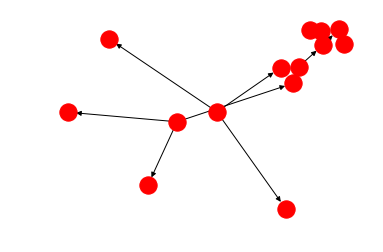

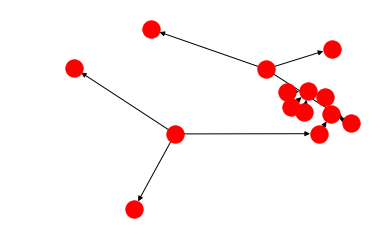

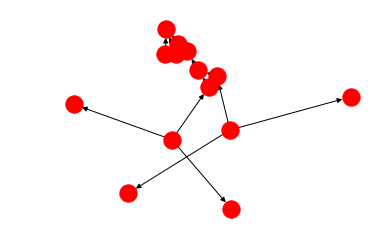

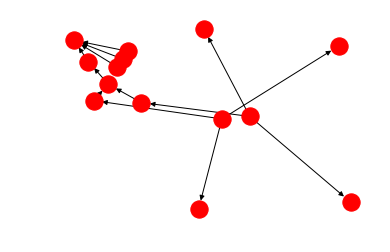

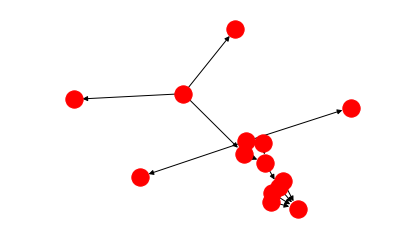

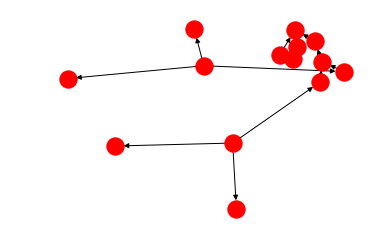

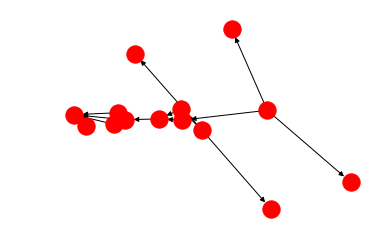

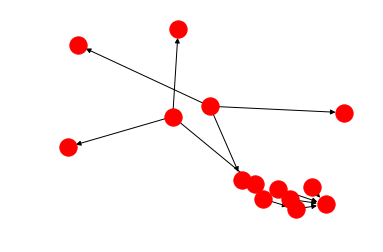

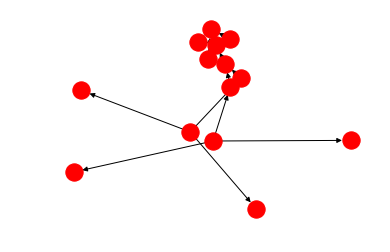

In [6]:
rule01.view()
rule02.view()
rule03.view()
rule04.view()
rule05.view()
rule06.view()
rule07.view()
rule08.view()
rule09.view()

3. Penggambaran Transfer Function

4. Memasukan ke Rule Base (Proses)

NO	SENSOR KIRI	SENSOR KANAN	KECEPATAN
1	Dekat         0	Dekat               1.2	Pelan                       0
2	Sedang     -0.8	Sedang            0.8	Cukup Pelan         -0.8
3	Jauh           2.8	Jauh                 0	Cepat                      0
4			Sangat Cepat        0
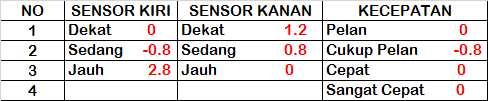

In [7]:
kecepatanroda_ctrl = ctrl.ControlSystem([rule01,rule02,rule03,rule04,rule05,rule06,rule07,rule08,rule09])

In [8]:
kecepatanroda = ctrl.ControlSystemSimulation(kecepatanroda_ctrl)

5. Defuzzyfikasi

59.99999999999998


C:\Users\M.Yusuf Raka\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


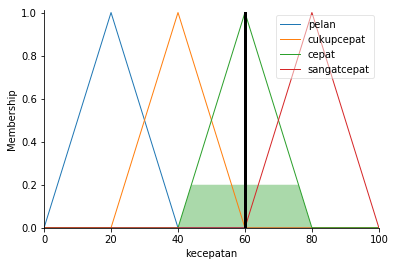

In [9]:
kecepatanroda.input['sensorkiri'] = 38
kecepatanroda.input['sensorkanan'] = 18

kecepatanroda.compute()

print(kecepatanroda.output['kecepatan'])
kecepatan_roda.view(sim=kecepatanroda)